In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Import Data

In [2]:
# Load the data into a pandas dataframe
df = pd.read_csv("./NewAirline.csv")

In [3]:
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,Distance,AirTime
count,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,49132.000000,49130.000000,49130.000000,49130.000000,50001.000000,49035.000000,48990.000000,48990.000000,48990.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,25000.000000,2004.297814,6.493650,15.707946,3.935701,1330.480350,1341.896279,8.943192,0.171748,10.851455,1492.508270,1487.021658,6.621086,12.161645,0.199531,0.017560,0.002660,732.739745,83.551889
std,14434.189742,9.228586,3.455136,8.757785,1.989031,476.962108,482.366040,34.126038,0.377165,33.384495,494.623108,506.127726,36.345816,33.567238,0.399652,0.131346,0.051507,569.490033,74.881732
min,0.000000,1987.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-60.000000,0.000000,0.000000,0.000000,1.000000,-89.000000,0.000000,0.000000,0.000000,0.000000,11.000000,-686.000000
25%,12500.000000,1997.000000,3.000000,8.000000,2.000000,925.000000,929.000000,-3.000000,0.000000,0.000000,1115.000000,1110.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,321.000000,32.000000
50%,25000.000000,2005.000000,7.000000,16.000000,4.000000,1325.000000,1330.000000,0.000000,0.000000,0.000000,1520.000000,1519.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,577.000000,68.000000
75%,37500.000000,2012.000000,9.000000,23.000000,6.000000,1725.000000,1737.000000,7.000000,0.000000,7.000000,1914.000000,1915.000000,10.000000,10.000000,0.000000,0.000000,0.000000,967.000000,121.000000
max,50000.000000,2020.000000,12.000000,31.000000,7.000000,2359.000000,2400.000000,1380.000000,1.000000,1380.000000,2400.000000,2400.000000,1022.000000,1022.000000,1.000000,1.000000,1.000000,4983.000000,614.000000


In [4]:
#Subsetting the 2 main columns we need "Depature Delay Minutes" and " Depature Delay by 15min"
#Current range of delay is (0 - 14) as 0 and (15+) as 1
dep_delay = df[["DepDelayMinutes","DepDel15"]]
dep_delay

,DepDelayMinutes,DepDel15
0,19.0,1.0
1,0.0,0.0
2,14.0,0.0
3,0.0,0.0
4,51.0,1.0
...,...,...
49996,0.0,0.0
49997,0.0,0.0
49998,0.0,0.0
49999,0.0,0.0


In [5]:
#currently we relise that the highest minutes for Depature Delay is 1380 mins (24 hours)
# so we need to create More ranges and a number representation to match the higesht minute value
dep_delay["DepDelayMinutes"].max()

1380.0

## Clean Data

In [6]:
#Finding Null/NaN rows an summing them up
dep_delay.isnull().sum()

DepDelayMinutes    871
DepDel15           871
dtype: int64

In [7]:
#Filling Nan with 0
dep_delay = dep_delay.fillna(0)

In [8]:
#Checking that we got all empty or NaN rows
dep_delay.isnull().sum()

DepDelayMinutes    0
DepDel15           0
dtype: int64

In [9]:
# convert 'float_column' to integer type and saving to a new column
dep_delay['DepDelayMinutes_int'] = dep_delay['DepDelayMinutes'].fillna(0).astype(int)

# print the updated dataframe
dep_delay.head()

,DepDelayMinutes,DepDel15,DepDelayMinutes_int
0,19.0,1.0,19
1,0.0,0.0,0
2,14.0,0.0,14
3,0.0,0.0,0
4,51.0,1.0,51


In [10]:
# create function to check if number is in the new range ['0-14','15-60', '61-180', '181-300', '301-600', '601-900', '901-1200', '1201+']
def check_range(num):
    if  num < 15:
        return 0
    elif 15 <= num <= 60:
        return 1
    elif 61 <= num <= 180:
        return 2
    elif 181 <= num <= 300:
        return 3
    elif 301 <= num <= 600:
        return 4
    elif 601 <= num <= 901:
        return 5
    elif 901 <= num <= 1200:
        return 6
    else:
        return 7

# apply check_range function to 'number' column and create new column 'range'
dep_delay['Range'] = dep_delay['DepDelayMinutes_int'].apply(check_range)



In [11]:
#Verifying that we have 5,6,7 values
dep_delay[(dep_delay["Range"] == 5) | (dep_delay["Range"] == 6) | (dep_delay["Range"] == 7)].head(10)


,DepDelayMinutes,DepDel15,DepDelayMinutes_int,Range
649,640.0,1.0,640,5
2221,638.0,1.0,638,5
5808,975.0,1.0,975,6
12605,699.0,1.0,699,5
13766,852.0,1.0,852,5
19044,602.0,1.0,602,5
19769,880.0,1.0,880,5
24484,602.0,1.0,602,5
26008,1039.0,1.0,1039,6
26085,1380.0,1.0,1380,7


In [12]:
#Create a new column to represent the range.
# Define the ranges and their corresponding labels
ranges = [(0, 14),(15, 60), (61, 180), (181, 300), (301, 600), (601, 900), (901, 1200), (1201, float('inf'))]
range_labels = ['0-14','15-60', '61-180', '181-300', '301-600', '601-900', '901-1200', '1201+']

dep_delay['Range_label'] = pd.cut(dep_delay['DepDelayMinutes_int'], bins=[r[0] for r in ranges] + [ranges[-1][1]+1], labels=range_labels)

In [13]:
# filling 0 value withe "0-14" label
dep_delay['Range_label'] = dep_delay['Range_label'].fillna("0-14")
dep_delay

,DepDelayMinutes,DepDel15,DepDelayMinutes_int,Range,Range_label
0,19.0,1.0,19,1,15-60
1,0.0,0.0,0,0,0-14
2,14.0,0.0,14,0,0-14
3,0.0,0.0,0,0,0-14
4,51.0,1.0,51,1,15-60
...,...,...,...,...,...
49996,0.0,0.0,0,0,0-14
49997,0.0,0.0,0,0,0-14
49998,0.0,0.0,0,0,0-14
49999,0.0,0.0,0,0,0-14


In [14]:
# rename the 'Range' column to 'Delay_range'
new_dep_delay = dep_delay.rename(columns={'Range': 'Delay_range'})

In [15]:
new_dep_delay.head()

,DepDelayMinutes,DepDel15,DepDelayMinutes_int,Delay_range,Range_label
0,19.0,1.0,19,1,15-60
1,0.0,0.0,0,0,0-14
2,14.0,0.0,14,0,0-14
3,0.0,0.0,0,0,0-14
4,51.0,1.0,51,1,15-60


In [16]:
# '0-14' -- "On-time"
# '15-60' -- "Compact"
# '61-180' -- "Moderate"
# '181-300' -- "Average"
# '301-600' -- "Large"
# '601-900' -- "Grand"
# '901-1200' -- "Collosal"
# '1201+' -- "Gigantic"

# create function to assign a number to a "range label"
def add_range_label(num):
    if  num == 0:
        return "On-time"
    elif num == 1:
        return "Compact"
    elif num == 2:
        return "Moderate"
    elif num == 3:
        return "Average"
    elif num == 4:
        return "Large"
    elif num == 5:
        return "Grand"
    elif num == 6:
        return "Collosal"
    else:
        return "Gigantic"

        
new_dep_delay["Delay_label"] = new_dep_delay['Delay_range'].apply(add_range_label)
new_dep_delay.head()

,DepDelayMinutes,DepDel15,DepDelayMinutes_int,Delay_range,Range_label,Delay_label
0,19.0,1.0,19,1,15-60,Compact
1,0.0,0.0,0,0,0-14,On-time
2,14.0,0.0,14,0,0-14,On-time
3,0.0,0.0,0,0,0-14,On-time
4,51.0,1.0,51,1,15-60,Compact


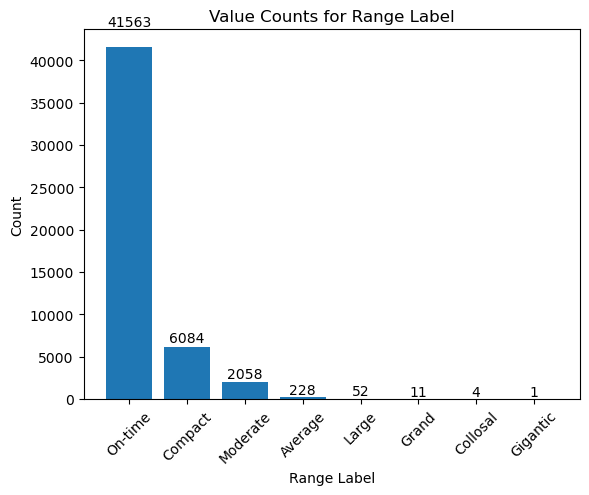

In [17]:
#Creating a BAR CHART to visualize the data

from matplotlib import pyplot as plt 

v_c = new_dep_delay["Delay_label"].value_counts()

# Create a bar chart using Matplotlib
fig, ax = plt.subplots()
rects = ax.bar(v_c.index, v_c.values)

# Add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '%d' % int(height),
            ha='center', va='bottom')

# Add labels and a title to the plot
plt.xlabel('Range Label')
plt.ylabel('Count')
plt.title('Value Counts for Range Label')

# Rotate the x-axis labels to adjust spacing
plt.xticks(rotation=45)
# plt.yscale('log')


# Display the plot
plt.show()

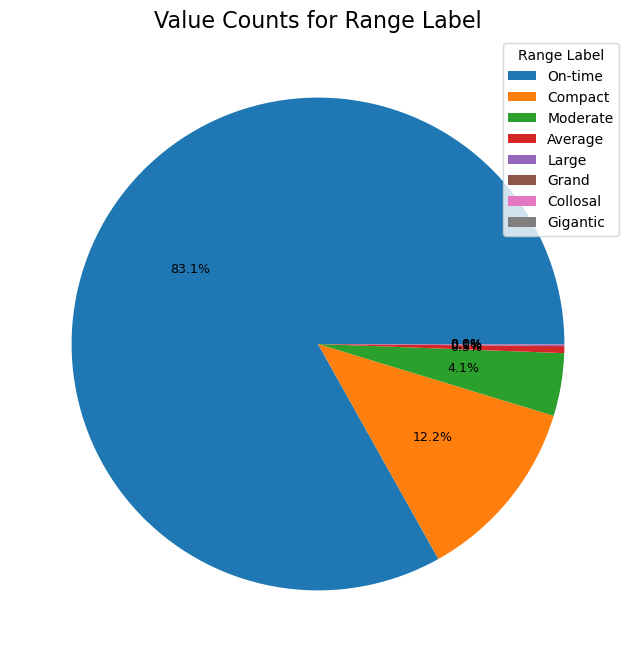

In [18]:
#Breakdown by percentage of delays:

# Calculate percentage breakdown
percentages = v_c.values / v_c.values.sum()

# Create a pie chart using Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
wedges, labels, _ = ax.pie(percentages, autopct='%1.1f%%', textprops={'fontsize': 9}, labeldistance=1.1)

# Add a legend to the plot
plt.legend(wedges, v_c.index, title='Range Label', loc='best')

# Add a title to the plot
plt.title('Value Counts for Range Label', fontsize=16)

# Display the plot
plt.show()



## Logistic Regression

In [19]:
#We are trying to predict the type of Depature Delay of flights based one the Difference between "Listed Depature Time" and the "Actual Depature Time"
#If the Value given falls in a certain range we can predict the type of delay that may occur.

# '0-14' -- "On-time" - 0
# '15-60' -- "Compact" - 1
# '61-180' -- "Moderate" - 2
# '181-300' -- "Average" - 3
# '301-600' -- "Large" - 4
# '601-900' -- "Grand" - 5
# '901-1200' -- "Collosal" - 6
# '1201+' -- "Gigantic" - 7



In [20]:
#Assigning X and Y and reshaping to be bale to be used in the model. 
x = new_dep_delay[["DepDelayMinutes_int"]]
y = new_dep_delay[["Delay_range"]]

x.values.reshape(-1, 1)
y = np.ravel(y)
y = column_or_1d(y, warn=True)



In [21]:
# Split the data into training and testing sets

# .20 = 20%  80 Train 20% test
train_data, test_data, train_target, test_target = train_test_split(x, y, test_size=0.2,random_state=21)




In [22]:
# Train the model
#Increase the size to manage all 50,000 rows
model = LogisticRegression(max_iter=60000)
model.fit(train_data, train_target)


LogisticRegression(max_iter=60000)

In [23]:

# Convert the test data to a 2D array
test_data_2d = np.ravel(test_data)
test_data_2d = column_or_1d(test_data_2d, warn=True)
test_data_reshaped = test_data_2d.reshape(-1, 1)

#Predict using the test data
predictions = model.predict(test_data_reshaped)
predictions


/Users/dogerthat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 0])

In [24]:
# Add two columns  to show "test data" and "predictions" outcome
df_prediction = pd.DataFrame()
df_prediction['prediction'] = predictions
df_prediction['test_data'] = test_data_reshaped

#Viewing the output greater than or equal to 4
df_prediction[df_prediction['prediction']>=4].head(1000)


,prediction,test_data
571,4,359
724,4,312
753,4,343
1050,6,962
1306,4,319
1572,4,395
2564,4,554
2890,5,695
3700,4,370
4380,4,389


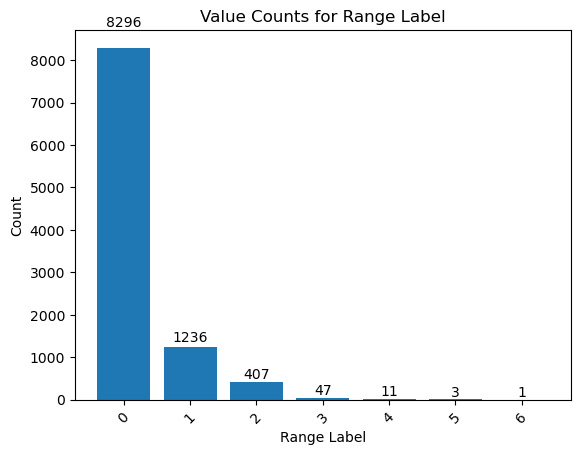

In [25]:
# Create a bar chart using Matplotlib
df_validate = df_prediction["prediction"].value_counts()
df_validate
fig, ax = plt.subplots()
rects = ax.bar(df_validate.index, df_validate.values)

# Add value labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '%d' % int(height),
            ha='center', va='bottom')

# Add labels and a title to the plot
plt.xlabel('Range Label')
plt.ylabel('Count')
plt.title('Value Counts for Range Label')

# Rotate the x-axis labels to adjust spacing
plt.xticks(rotation=45)
# plt.yscale('log')


# Display the plot
plt.show()

In [66]:
number_list = np.arange(1, 301)
arr = np.arange(1, 301).reshape(-1, 1)

pred_values = model.predict(arr)
print(pred_values)
print(number_list)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

/Users/dogerthat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


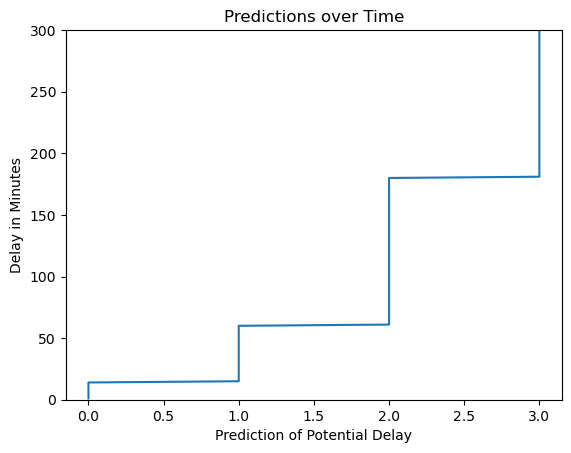

In [67]:
# create the plot
plt.plot(pred_values, number_list)

# add title and axis labels
plt.title('Predictions over Time')
plt.xlabel('Prediction of Potential Delay')
plt.ylabel('Delay in Minutes')
plt.ylim([0, 300])
plt.show()

# display the plot
plt.show()

In [26]:
#Testing the Accuracy of the prediction
accuracy = accuracy_score(test_target, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9999000099990001
